In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
meanprops = dict(linestyle='-', linewidth=2, color='k', alpha=1)
whiskerprops=dict(linestyle='-', linewidth=0)


<ipython-input-1-e1e476268f6b>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [13]:
exp_names = ["svhn",
            "cifar10",
            "cifar100",
            "super_cifar100",
            "camelyon",
            "animals",
             "breeds",
            ]

df_list = []
for exp in exp_names:
    in_path = os.path.join("/Users/Paul/research/files/analysis/csvs/{}_paper_sweep.csv".format(exp))
    df =  pd.read_csv(in_path)
    df = df.dropna(subset=["name", "model"])
    df = df.drop_duplicates(subset=["name", "study", "model", "network", "confid"])
    df = df[(~df.study.str.contains("tinyimagenet_original")) & (~df.study.str.contains("tinyimagenet_proposed"))]
    if exp == "cifar10" or exp == "cifar100" or exp == "super_cifar100":
        df = df[(df.name.str.contains("vgg13"))]
    if exp == "super_cifar100":
        df = df[df.study == "iid_study"]
        df["study"] = df.apply(lambda row: "cifar100_in_class_study_superclasses", axis=1)
    else:
        df["study"] = df.apply(lambda row: exp + "_" + row["study"], axis=1)
    print(exp, len(df.groupby("name").count()))

    df_list.append(df)

df = pd.concat(df_list)
exp_names = [e for e in exp_names if e !="super_cifar100"]

svhn 60
cifar10 80
cifar100 90
super_cifar100 90
camelyon 120
animals 70
breeds 28


In [198]:
df[(df.name.str.contains("dg_bbvgg13_do1")) & (df.study == "cifar100_iid_study") & (df.confid=="dg_mcd_mcp")]

Unnamed: 0                       name               study network  \
15833  5.0         dg_bbvgg13_do1_run5_rew20  cifar100_iid_study  NaN      
15844  5.0         dg_bbvgg13_do1_run4_rew20  cifar100_iid_study  NaN      
15866  5.0         dg_bbvgg13_do1_run2_rew20  cifar100_iid_study  NaN      
15899  5.0         dg_bbvgg13_do1_run3_rew20  cifar100_iid_study  NaN      
15921  5.0         dg_bbvgg13_do1_run1_rew20  cifar100_iid_study  NaN      

       fold      confid  n_test  accuracy      nll  brier_score  failauc  \
15833  0.0   dg_mcd_mcp  9000.0  0.75189   0.00943  0.33931      0.87885   
15844  0.0   dg_mcd_mcp  9000.0  0.75489   0.00946  0.33609      0.87792   
15866  0.0   dg_mcd_mcp  9000.0  0.75867   0.00943  0.33658      0.87467   
15899  0.0   dg_mcd_mcp  9000.0  0.75489   0.00938  0.33551      0.87918   
15921  0.0   dg_mcd_mcp  9000.0  0.75422   0.00943  0.33917      0.87550   

       failap_suc  failap_err      mce      ece    e-aurc      aurc  \
15833  0.95835     0.66750     0.10764  0.03090  33.42671  67.12413   
15844  0.95865     0.65476     0.13374  0.03437  33.33363  66.18153   
15866  0.95798     0.65765     0.11589  0.03873  33.96018  65.75527   
15899  0.95888     0.67369     0.11411  0.03472  33.11834  65.96624   
15921  0.95703     0.66781     0.11192  0.03498  34.54311  67.57876   

       fpr@95tpr  risk@100cov  risk@95cov  risk@90cov  risk@85cov  risk@80cov  \
15833  0.60591    24.81111     21.85965    19.17047    16.65359    14.20636     
15844  0.62466    24.51111     21.83626    19.17047    16.55560    14.24011     
15866  0.61142    24.13333     21.16464    18.49476    16.07843    13.82373     
15899  0.61695    24.51111     21.49708    18.95828    16.53595    14.20636     
15921  0.62206    24.57778     21.68421    19.04703    16.57300    14.21630     

       risk@75cov  test_risk  test_cov  diff_risk  diff_cov  rstar  val_theta  \
15833  12.02785    0.21204    0.93744  -0.00086    0.00744   0.25   0.20825     
15844  11.89277    0.20775    0.92956  -0.00523    0.00456   0.25   0.21863     
15866  11.74815    0.19824    0.92422  -0.01459   -0.01078   0.25   0.22876     
15899  12.00000    0.21178    0.94333  -0.00151    0.01033   0.25   0.19214     
15921  11.82047    0.20531    0.92867  -0.00727    0.00667   0.25   0.21838     

      run  select_rew  select_do  
15833  5   1           1          
15844  4   1           1          
15866  2   1           1          
15899  3   1           1          
15921  1   1           1

In [ ]:
df.groupby("study").count()

In [15]:
df["backbone"] = df.apply(lambda row: row["name"].split("bb")[1].split("_")[0], axis=1)
df["dropout"] = df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
df["model"] = df.apply(lambda row: row["name"].split("_")[0], axis=1)
df["run"] = df.apply(lambda row: row["name"].split("run")[1].split("_")[0], axis=1)
df["rew"] = df.apply(lambda row: row["name"].split("_rew")[1].split("_")[0], axis=1)
df["confid"] = df.apply(lambda row: row["model"] + "_" + row["confid"] + "_" + row["dropout"] + "_" + row["rew"], axis=1)
df = df.drop("model", axis=1)
df = df.drop("dropout", axis=1)


df = df.drop("backbone", axis=1)
print(len(df))

24038


In [16]:

# MODEL SELECTION

def select_func(row, selection_df, selection_column):
    name_splitter = -1 if selection_column == "rew" else -2
    row_exp = row["study"].split("_")[0] + "_"
    row_confid = "_".join(row["confid"].split("_")[:name_splitter])
    selection_df = selection_df[(selection_df.study.str.contains(row_exp)) & (selection_df.confid == row_confid)]
    try:
        if row[selection_column] == selection_df[selection_column].tolist()[0]:
            return 1
        else:
            return 0
    except:
        assert 1==2
        #print(row_exp, row_confid, len(selection_df))

ms_metric = "aurc" # Careful, when changing consider changing idxmin -> idxmax

# REWARD
non_agg_columns = ["study", "confid", "rew"]
ms_filter_metrics_df = df[["study", "confid", "run", "rew", ms_metric]]
df_ms = ms_filter_metrics_df.groupby(by=non_agg_columns).mean().reset_index()
print(len(df_ms), len(ms_filter_metrics_df))
df_ms = df_ms[df_ms.study.str.contains("val_tuning")]
df_ms["confid"] = df_ms.apply(lambda row: "_".join(row["confid"].split("_")[:-1]), axis=1)
df_ms = df_ms.loc[df_ms.groupby(['study', 'confid'])[ms_metric].idxmin().reset_index()[ms_metric]]
print(len(df), len(df_ms))
df["select_rew"] = df.apply(lambda row: select_func(row, df_ms, "rew"), axis=1)
selected_df = df[df.select_rew == 1]

# DROPOUT
non_agg_columns = ["study", "confid", "dropout"]
selected_df["dropout"] = selected_df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
do_filter_metrics_df = selected_df[["study", "confid", "run", "dropout", ms_metric]]
df_do = do_filter_metrics_df.groupby(by=non_agg_columns).mean().reset_index()
print(len(df_do), len(do_filter_metrics_df))
df_do = df_do[df_do.study.str.contains("val_tuning")]
df_do["confid"] = df_do.apply(lambda row: "_".join(row["confid"].split("_")[:-2]), axis=1)
df_do = df_do.loc[df_do.groupby(['study', 'confid'])[ms_metric].idxmin().reset_index()[ms_metric]]
print(len(df), len(selected_df), len(df_do))
selected_df["select_do"] = selected_df.apply(lambda row: select_func(row, df_do, "dropout"), axis=1)
all_selected_df = selected_df[selected_df.select_do == 1]

4732 24038
24038 252
1848 9492
24038 9492 198


<ipython-input-16-82047a54ca13>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df["dropout"] = selected_df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
<ipython-input-16-82047a54ca13>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df["select_do"] = selected_df.apply(lambda row: select_func(row, df_do, "dropout"), axis=1)


In [17]:
pd.set_option('display.max_rows', 200)
print(len(df), len(selected_df))
all_selected_df[(all_selected_df.study.str.contains("val_tuning")) & (all_selected_df.run == "1")][["study", "confid", "rew", "dropout", "aurc"]]

24038 9492


study                      confid  rew dropout       aurc
155    svhn_val_tuning      dg_mcd_mcp_1_6              6    1       3.59609  
160    svhn_val_tuning      dg_mcd_waic_1_6             6    1       3.58584  
185    svhn_val_tuning      dg_dg_1_2.2                 2.2  1       4.12535  
186    svhn_val_tuning      dg_dg_mcd_1_2.2             2.2  1       4.53480  
187    svhn_val_tuning      dg_dg_waic_1_2.2            2.2  1       4.63840  
238    svhn_val_tuning      dg_det_mcp_1_3              3    1       4.21393  
239    svhn_val_tuning      dg_det_pe_1_3               3    1       3.47433  
244    svhn_val_tuning      dg_mcd_pe_1_3               3    1       3.72927  
245    svhn_val_tuning      dg_mcd_ee_1_3               3    1       3.72339  
246    svhn_val_tuning      dg_mcd_mi_1_3               3    1       4.15414  
247    svhn_val_tuning      dg_mcd_sv_1_3               3    1       4.06482  
3417   svhn_val_tuning      confidnet_det_mcp_1_2.2     2.2  1       4.60822  
3418   svhn_val_tuning      confidnet_det_pe_1_2.2      2.2  1       3.55896  
3419   svhn_val_tuning      confidnet_tcp_1_2.2         2.2  1       3.48524  
3420   svhn_val_tuning      confidnet_tcp_mcd_1_2.2     2.2  1       3.43758  
3421   svhn_val_tuning      confidnet_tcp_waic_1_2.2    2.2  1       3.50349  
3422   svhn_val_tuning      confidnet_mcd_mcp_1_2.2     2.2  1       3.56534  
3423   svhn_val_tuning      confidnet_mcd_pe_1_2.2      2.2  1       3.58737  
3424   svhn_val_tuning      confidnet_mcd_ee_1_2.2      2.2  1       3.50788  
3425   svhn_val_tuning      confidnet_mcd_mi_1_2.2      2.2  1       3.82171  
3426   svhn_val_tuning      confidnet_mcd_sv_1_2.2      2.2  1       3.76905  
3427   svhn_val_tuning      confidnet_mcd_waic_1_2.2    2.2  1       3.55929  
3898   svhn_val_tuning      devries_det_mcp_1_2.2       2.2  1       5.69088  
3899   svhn_val_tuning      devries_det_pe_1_2.2        2.2  1       3.67198  
3900   svhn_val_tuning      devries_devries_1_2.2       2.2  1       5.58958  
3901   svhn_val_tuning      devries_devries_mcd_1_2.2   2.2  1       6.03458  
3902   svhn_val_tuning      devries_devries_waic_1_2.2  2.2  1       6.12996  
3903   svhn_val_tuning      devries_mcd_mcp_1_2.2       2.2  1       3.76316  
3904   svhn_val_tuning      devries_mcd_pe_1_2.2        2.2  1       3.82174  
3905   svhn_val_tuning      devries_mcd_ee_1_2.2        2.2  1       3.84395  
3906   svhn_val_tuning      devries_mcd_mi_1_2.2        2.2  1       4.01887  
3907   svhn_val_tuning      devries_mcd_sv_1_2.2        2.2  1       3.87809  
3908   svhn_val_tuning      devries_mcd_waic_1_2.2      2.2  1       3.78304  
0      cifar10_val_tuning   devries_det_mcp_0_2.2       2.2  0       5.55643  
2      cifar10_val_tuning   devries_devries_0_2.2       2.2  0       4.36526  
461    cifar10_val_tuning   dg_dg_0_2.2                 2.2  0       4.67663  
1623   cifar10_val_tuning   dg_mcd_pe_1_3               3    1       4.74644  
1624   cifar10_val_tuning   dg_mcd_ee_1_3               3    1       5.05567  
1642   cifar10_val_tuning   dg_dg_mcd_1_2.2             2.2  1       5.70895  
1643   cifar10_val_tuning   dg_dg_waic_1_2.2            2.2  1       6.10491  
2421   cifar10_val_tuning   confidnet_det_mcp_1_2.2     2.2  1       5.41121  
2422   cifar10_val_tuning   confidnet_det_pe_1_2.2      2.2  1       5.25415  
2423   cifar10_val_tuning   confidnet_tcp_1_2.2         2.2  1       4.85647  
2424   cifar10_val_tuning   confidnet_tcp_mcd_1_2.2     2.2  1       5.13564  
2425   cifar10_val_tuning   confidnet_tcp_waic_1_2.2    2.2  1       5.30801  
2426   cifar10_val_tuning   confidnet_mcd_mcp_1_2.2     2.2  1       5.11616  
2427   cifar10_val_tuning   confidnet_mcd_pe_1_2.2      2.2  1       5.40138  
2428   cifar10_val_tuning   confidnet_mcd_ee_1_2.2      2.2  1       5.19367  
2429   cifar10_val_tuning   confidnet_mcd_mi_1_2.2      2.2  1       5.96129  
2430   cifar10_val_tuning   confidnet_mcd_sv_1_2.2      2.2  1       5.

In [144]:
def rename_confids(in_confid):
    confid = in_confid.replace("confidnet_", "")
    confid = confid.replace("_dg", "_res")
    # confid = confid.replace("dg_", "deepgamblers_")
    confid = confid.replace("_det", "")
    confid = confid.replace("det_", "")
    confid = confid.replace("_devries", "")
    confid = confid.replace("tcp", "confidnet")
    return confid

# FINAL CLEANING AND ASSIGNING OF DF
clean_df = all_selected_df.drop("dropout", axis=1)
clean_df = clean_df.drop("rew", axis=1)
clean_df = clean_df[~clean_df.confid.str.contains("waic")]
clean_df["confid"] = clean_df.apply(lambda row: "_".join(row["confid"].split("_")[:-2]), axis=1)
clean_df["confid"] = clean_df.apply(lambda row: rename_confids(row["confid"]), axis=1)
clean_df = clean_df[~clean_df.confid.str.contains("devries_")]
clean_df = clean_df[~clean_df.confid.str.contains("_sv")]
clean_df = clean_df[~clean_df.confid.str.contains("_mi")]
df = clean_df
print(df.columns)

Index(['Unnamed: 0', 'name', 'study', 'network', 'fold', 'confid', 'n_test',
       'accuracy', 'nll', 'brier_score', 'failauc', 'failap_suc', 'failap_err',
       'mce', 'ece', 'e-aurc', 'aurc', 'fpr@95tpr', 'risk@100cov',
       'risk@95cov', 'risk@90cov', 'risk@85cov', 'risk@80cov', 'risk@75cov',
       'test_risk', 'test_cov', 'diff_risk', 'diff_cov', 'rstar', 'val_theta',
       'run', 'select_rew', 'select_do'],
      dtype='object')


In [145]:
# Agregate over runs. Number TABLES. TODO GET RID OF REWARD FOR PROPER RANKING ACROSS STUDIES!

metric = "aurc"
non_agg_columns = ["study", "confid"] # might need rew if no model selection
filter_metrics_df = df[non_agg_columns + ["run", metric]]
df_mean = filter_metrics_df.groupby(by=non_agg_columns).mean().reset_index().round(3)
df_std = filter_metrics_df.groupby(by=non_agg_columns).std().reset_index().round(3)

studies = df_mean.study.unique().tolist()
dff = df_mean[df_mean.study=="cifar100_iid_study"][["confid"]]
print("CHECK LEN DFF", len(dff), len(df_mean))
combine_and_str = False
if combine_and_str:
    agg_mean_std = lambda s1, s2: s1  if (s1.name == "confid" or s1.name == "study" or s1.name=="rew") else s1.astype(str) + " ± " + s2.astype(str)
    df_mean = df_mean.combine(df_std, agg_mean_std)
    for s in studies:
        sdf = df_mean[df_mean.study == s]
        dff[s] = dff["confid"].map(sdf.set_index("confid")[metric])


else:
    for s in studies:
        sdf = df_mean[df_mean.study == s]
        dff[s] = dff["confid"].map(sdf.set_index("confid")[metric])
        # print("DFF", dff.columns.tolist())


CHECK LEN DFF 15 660


In [146]:
# PLOT METRICS SELECTION

dff[["confid"] + [c for c in dff.columns if "original" in c]]

confid  cifar100_new_class_study_cifar10_original_mode  \
135  confidnet      305.682                                          
136  confidnet_mcd  302.623                                          
137  devries        309.971                                          
138  dg_mcd_ee      297.465                                          
139  dg_mcd_mcp     295.634                                          
140  dg_mcd_pe      294.664                                          
141  dg_mcp         300.917                                          
142  dg_pe          295.644                                          
143  dg_res         302.553                                          
144  dg_res_mcd     306.280                                          
145  mcd_ee         294.017                                          
146  mcd_mcp        295.516                                          
147  mcd_pe         291.806                                          
148  mcp            298.093                                          
149  pe             300.900                                          

     cifar100_new_class_study_svhn_original_mode  \
135  530.849                                       
136  502.501                                       
137  600.151                                       
138  525.398                                       
139  518.904                                       
140  517.581                                       
141  509.712                                       
142  489.279                                       
143  481.424                                       
144  481.500                                       
145  518.593                                       
146  525.161                                       
147  513.247                                       
148  509.355                                       
149  567.373                                       

     cifar100_new_class_study_tinyimagenet_resize_original_mode  \
135  262.452                                                      
136  299.350                                                      
137  323.592                                                      
138  301.544                                                      
139  303.428                                                      
140  298.196                                                      
141  289.883                                                      
142  274.449                                                      
143  264.486                                                      
144  254.494                                                      
145  286.058                                                      
146  301.933                                                      
147  282.025                                                      
148  308.816                                                      
149  262.737                                                      

     cifar10_new_class_study_cifar100_original_mode  \
135  224.599                                          
136  225.120                                          
137  227.170                                          
138  227.993                                          
139  228.249                                          
140  228.667                                          
141  245.468                                          
142  238.906                                          
143  242.541                                          
144  226.467                                          
145  222.461                                          
146  227.077                                          
147  223.149                                          
148  236.202                                          
149  225.090                                          

     cifar10_new_class_study_svhn_original_mode  \
135  422.780                                      
13

In [147]:

# RANKING DF

# dff = dff[["confid", "rew"] + [c for c in dff.columns if  c.startswith("cifar100")]]
select_df = dff
rank_df = select_df.rank(na_option="keep", numeric_only=True, ascending=False)
# actually aurc should be ranked ascedingly, but we want the lowest rank to show on top on the y axis
# so careful when using this df for other things than this plot!

rank_df["confid"] = dff.confid

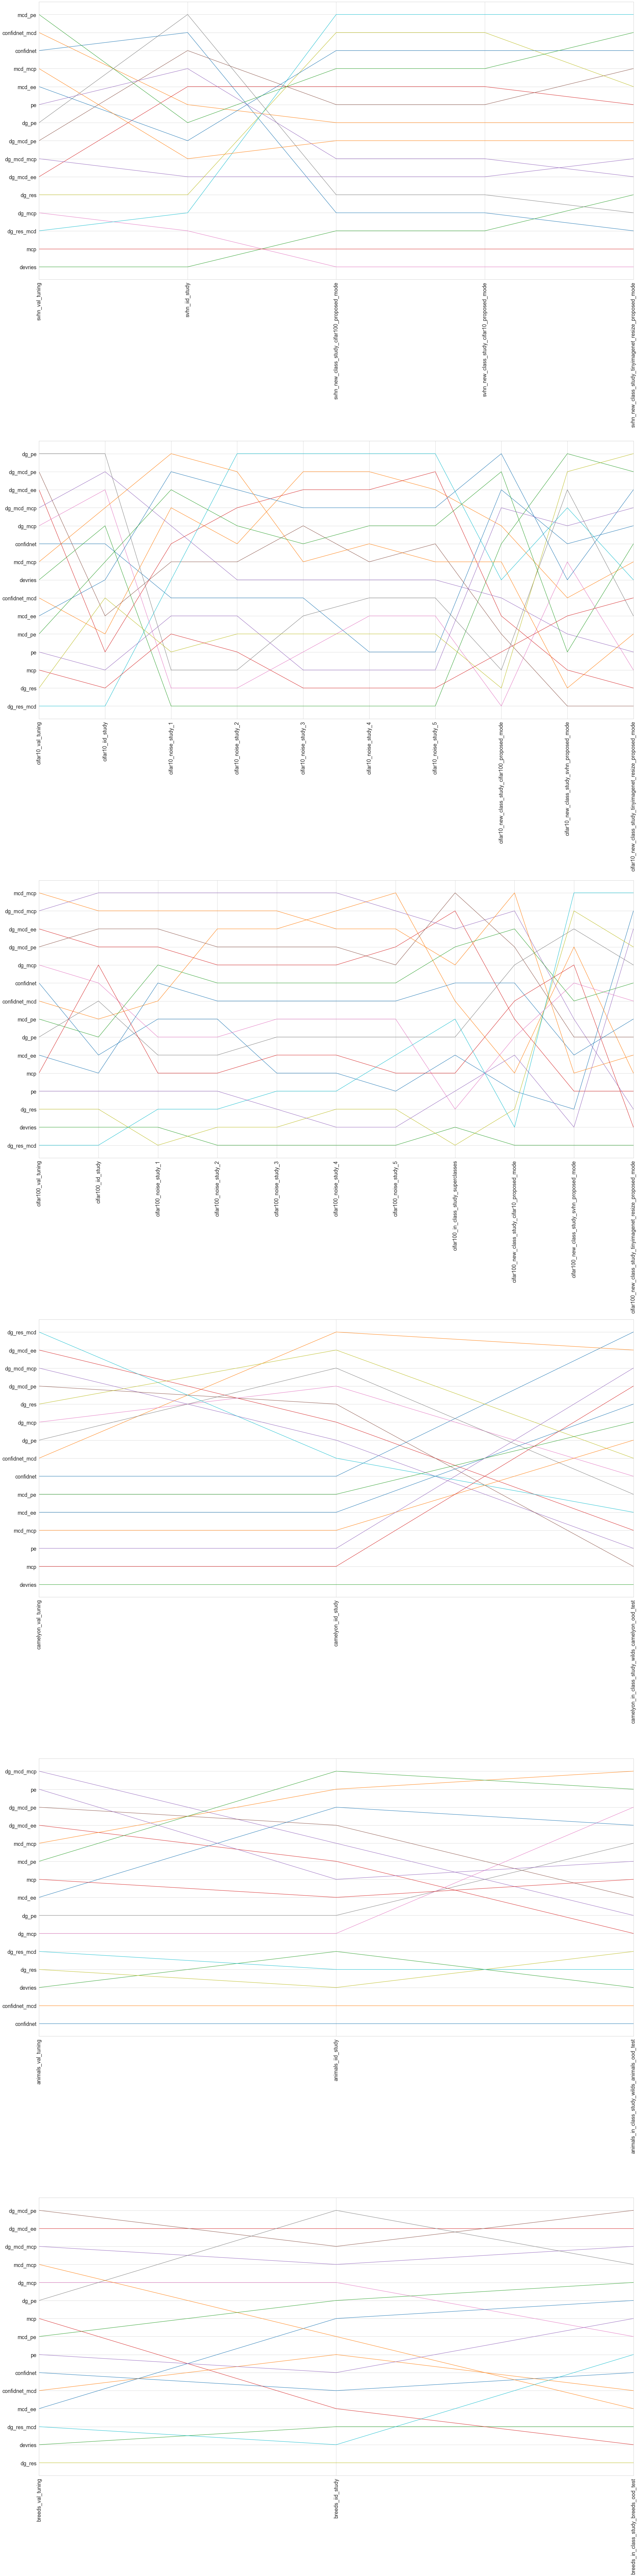

In [148]:
# RANKING PLOTS

scale = 10
sns.set_style("whitegrid")
plt_exps = exp_names
sns.set_context("paper", font_scale=scale * 0.20)
f, axs = plt.subplots(nrows=len(plt_exps), ncols=1, figsize=(3*scale, len(exp_names)*scale * 2))
# todo ! supercifar has to be a part of cifar100 exp. check also weird observation regarding val_tuning
for ax_ix, exp in enumerate(plt_exps):
        cols = [c for c in rank_df.columns if c.startswith(exp + "_")]
        cols = ["{}_val_tuning".format(exp), "{}_iid_study".format(exp)] + [c for c in cols if "noise" in c] + [c for c in cols if "in_class" in c] + [c for c in cols if "proposed" in c]
        numeric_exp_df = rank_df[cols]
        # todo DROPNAN?
        confids_list = rank_df.confid.tolist()
        x = range(len(numeric_exp_df.columns))
        for ix in range(len(numeric_exp_df)):
            y = numeric_exp_df.iloc[ix].values
            axs[ax_ix].plot(x, y)
        axs[ax_ix].set_yticks(range(1, len(numeric_exp_df) + 1))
        axs[ax_ix].set_yticklabels(rank_df[["confid"] + [c for c in rank_df.columns if c.startswith(exp)]].sort_values(by=numeric_exp_df.columns[0]).confid.tolist())
        axs[ax_ix].set_xticks(x)
        axs[ax_ix].set_xticklabels([c for c in numeric_exp_df.columns], rotation = 90)
        axs[ax_ix].set_xlim(0, len(numeric_exp_df.columns) - 1)

plt.tight_layout()
plt.show()

IID ['animals_iid_study', 'breeds_iid_study', 'camelyon_iid_study', 'cifar100_iid_study', 'cifar10_iid_study', 'svhn_iid_study']
SUB CLASS ['animals_in_class_study_wilds_animals_ood_test', 'breeds_in_class_study_breeds_ood_test', 'camelyon_in_class_study_wilds_camelyon_ood_test', 'cifar100_in_class_study_superclasses']
SEMANTIC NEW CLASS ['cifar100_new_class_study_cifar10_proposed_mode', 'cifar10_new_class_study_cifar100_proposed_mode']
NON-SEMANTIC NEW CLASS ['cifar100_new_class_study_svhn_proposed_mode', 'cifar100_new_class_study_tinyimagenet_resize_proposed_mode', 'cifar10_new_class_study_svhn_proposed_mode', 'cifar10_new_class_study_tinyimagenet_resize_proposed_mode', 'svhn_new_class_study_cifar100_proposed_mode', 'svhn_new_class_study_cifar10_proposed_mode', 'svhn_new_class_study_tinyimagenet_resize_proposed_mode']
NOISE ['cifar100_noise_study_1', 'cifar100_noise_study_2', 'cifar100_noise_study_3', 'cifar100_noise_study_4', 'cifar100_noise_study_5', 'cifar10_noise_study_1', 'cifar

<ipython-input-161-fa9b6a18f47b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_rank_df["iid"] = rank_df[iid_columns].sum(axis=1, numeric_only=True, skipna=False)
<ipython-input-161-fa9b6a18f47b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_rank_df["corruption-shift"] = rank_df[noise_columns].sum(axis=1, numeric_only=True, skipna=False)
<ipython-input-161-fa9b6a18f47b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

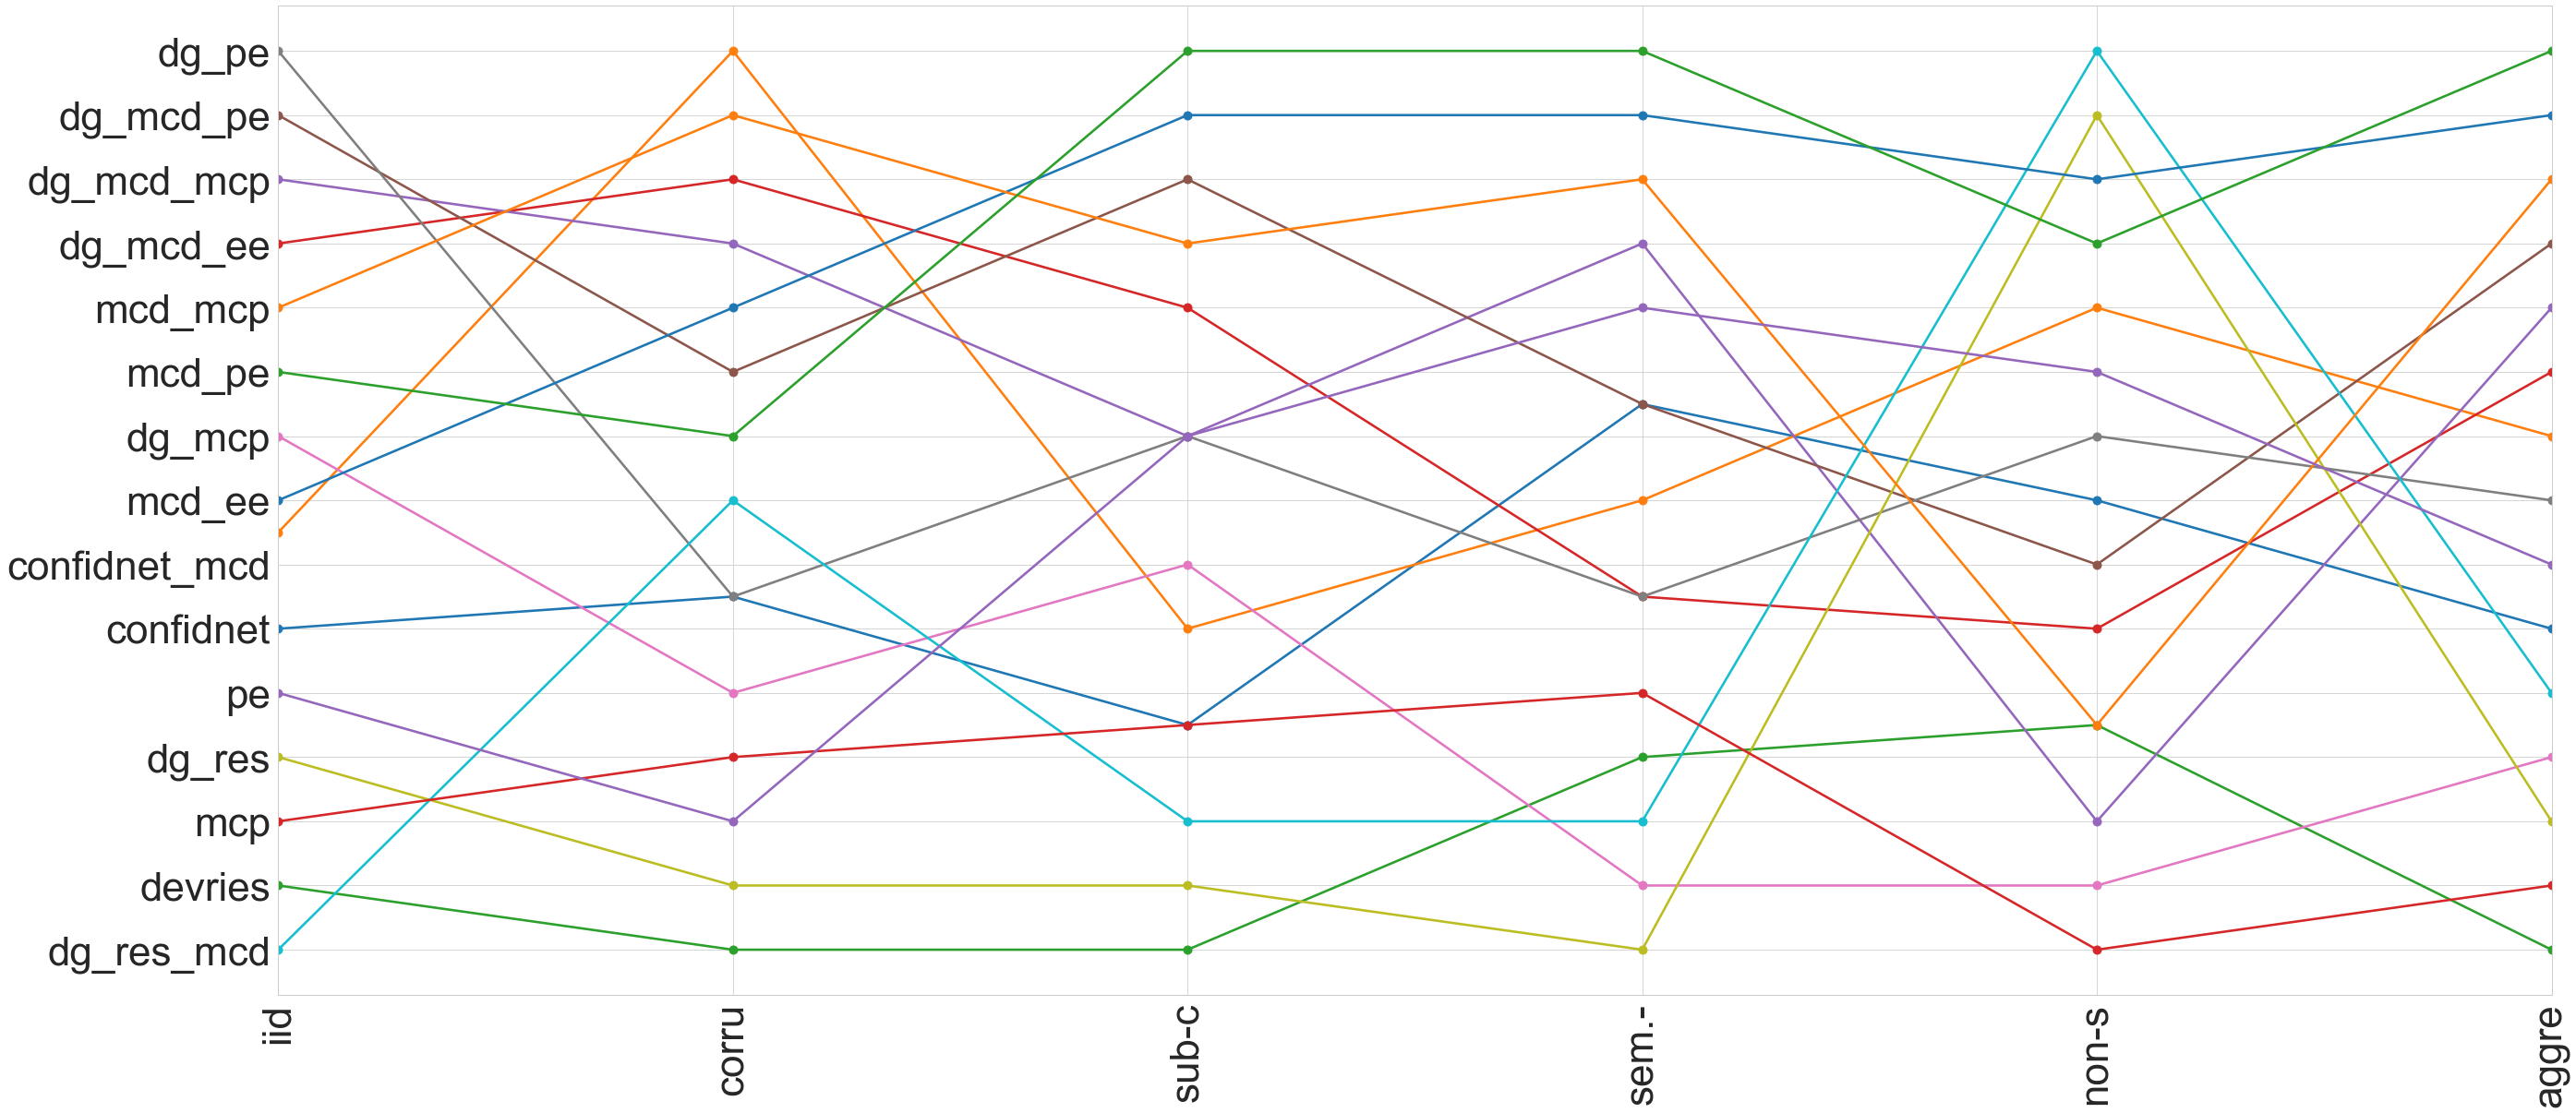

In [161]:
# SUM RANKING PLOTS

select_columns = [c for c in rank_df.columns]
iid_columns = [c for c in select_columns if "iid" in c]
print("IID", iid_columns)
in_class_columns = [c for c in select_columns if "in_class" in c]
print("SUB CLASS", in_class_columns)
new_class_columns = [c for c in select_columns if ("new_class" in c and "proposed" in c)]
sem_new_class_columns = [c for c in new_class_columns if ("cifar10_" in c and "cifar100_" in c)]
print("SEMANTIC NEW CLASS", sem_new_class_columns)
nonsem_new_class_columns = [c for c in new_class_columns if c not in sem_new_class_columns]
print("NON-SEMANTIC NEW CLASS", nonsem_new_class_columns)
noise_columns = [c for c in select_columns if "noise" in c]
print("NOISE", noise_columns)
sum_rank_df = rank_df[["confid"]]
sum_rank_df["iid"] = rank_df[iid_columns].sum(axis=1, numeric_only=True, skipna=False)
sum_rank_df["corruption-shift"] = rank_df[noise_columns].sum(axis=1, numeric_only=True, skipna=False)
if len(in_class_columns) > 0:
    sum_rank_df["sub-class-shift"] = rank_df[in_class_columns].sum(axis=1, numeric_only=True, skipna=False)
sum_rank_df["sem.-new-class-shift"] = rank_df[sem_new_class_columns].sum(axis=1, numeric_only=True, skipna=False)
sum_rank_df["non-sem.-new-class-shift"] = rank_df[nonsem_new_class_columns].sum(axis=1, numeric_only=True, skipna=False)
sum_rank_df = sum_rank_df.rank(na_option="keep", numeric_only=True, ascending=True)
sum_rank_df["confid"] = rank_df.confid
sum_rank_df["aggregated"] = sum_rank_df.sum(axis=1, numeric_only=True, skipna=False).rank(na_option="keep", ascending=True)

sum_rank_df["iid"] = sum_rank_df.apply(lambda row: row["iid"] + 0.5 if row["confid"] == "confidnet_mcd" else row["iid"], axis=1)
sum_rank_df["iid"] = sum_rank_df.apply(lambda row: row["iid"] - 0.5 if row["confid"] == "deepgamblers_mcd_mi" else row["iid"], axis=1)

scale = 10
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=scale * 0.50)
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(4*scale, 1.5*scale * 1.2))
# todo ! supercifar has to be a part of cifar100 exp. check also weird observation regarding val_tuning

show_columns = ["iid", "corruption-shift", "sub-class-shift", "sem.-new-class-shift", "non-sem.-new-class-shift", "aggregated"]
cols = show_columns#[c for c in sum_rank_df.columns if c.startswith("sum")]
numeric_exp_df = sum_rank_df[cols]
# todo DROPNAN?
confids_list = sum_rank_df.confid.tolist()
x = range(len(numeric_exp_df.columns))
for ix in range(len(numeric_exp_df)):
    y = numeric_exp_df.iloc[ix].values
    axs.plot(x, y, linewidth=2.6, marker=".", ms=18)
axs.set_yticks(range(1, len(numeric_exp_df) + 1))
axs.set_yticklabels(sum_rank_df.sort_values(by=numeric_exp_df.columns[0]).confid.tolist())
axs.set_xticks(x)
axs.set_xticklabels([c[:5] for c in numeric_exp_df.columns], rotation = 90)
axs.set_xlim(0, len(numeric_exp_df.columns) - 1)

plt.tight_layout()
plt.savefig("/Users/Paul/research/files/analysis/paper_plots/ranking.png")
plt.show()

In [24]:
dff.columns

Index(['confid', 'animals_iid_study',
       'animals_in_class_study_wilds_animals_ood_test', 'animals_val_tuning',
       'breeds_iid_study', 'breeds_in_class_study_breeds_ood_test',
       'breeds_val_tuning', 'camelyon_iid_study',
       'camelyon_in_class_study_wilds_camelyon_ood_test',
       'camelyon_val_tuning', 'cifar100_iid_study',
       'cifar100_in_class_study_superclasses',
       'cifar100_new_class_study_cifar10_original_mode',
       'cifar100_new_class_study_cifar10_proposed_mode',
       'cifar100_new_class_study_svhn_original_mode',
       'cifar100_new_class_study_svhn_proposed_mode',
       'cifar100_new_class_study_tinyimagenet_resize_original_mode',
       'cifar100_new_class_study_tinyimagenet_resize_proposed_mode',
       'cifar100_noise_study_1', 'cifar100_noise_study_2',
       'cifar100_noise_study_3', 'cifar100_noise_study_4',
       'cifar100_noise_study_5', 'cifar100_val_tuning', 'cifar10_iid_study',
       'cifar10_new_class_study_cifar100_original_mode

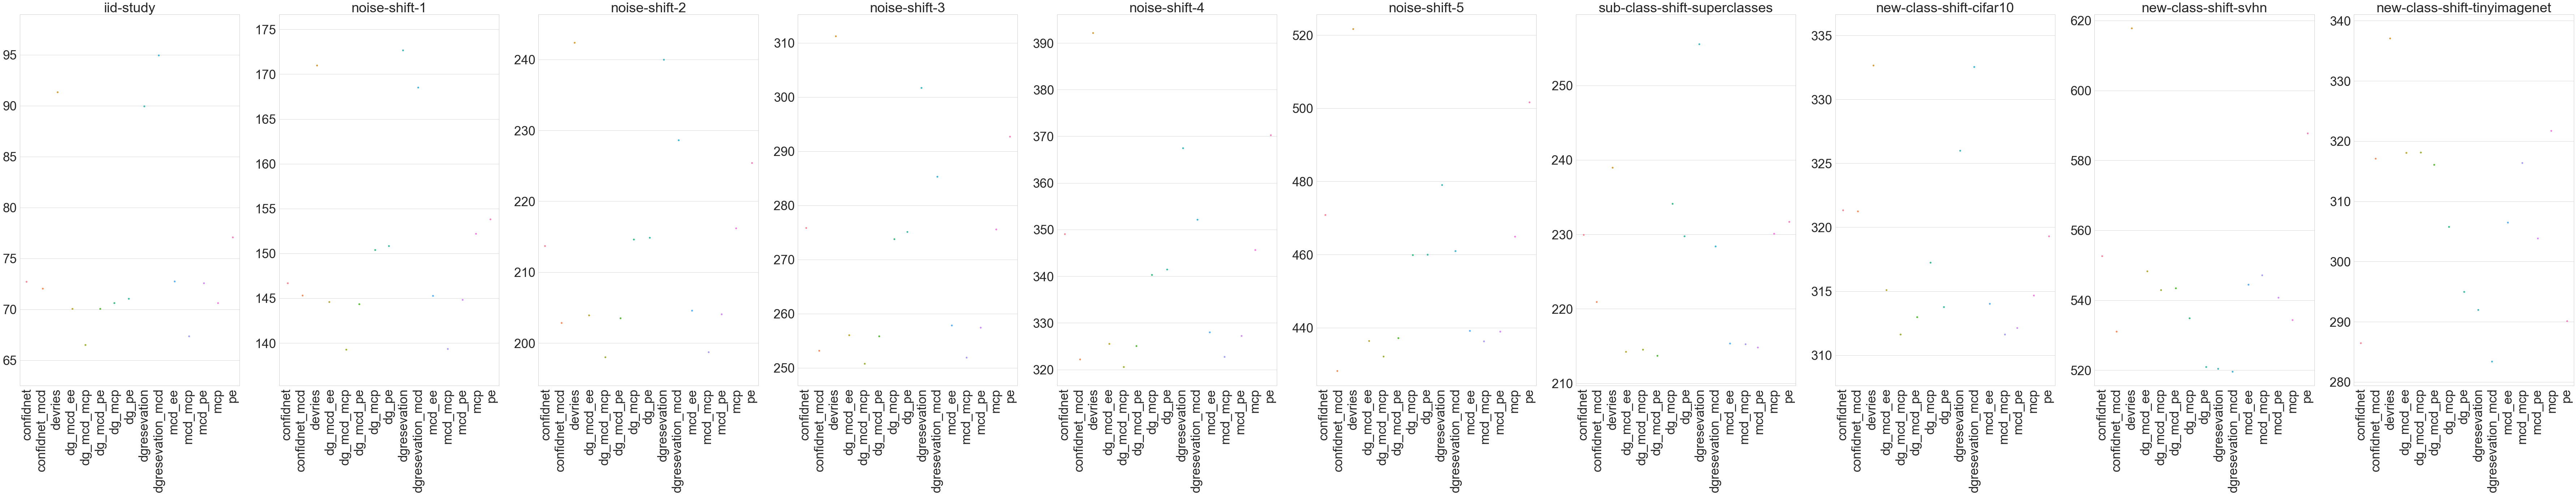

In [76]:
# BAR PLOTS


scale = 10
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=scale * 0.4)
for exp in ["cifar100"]:
    cols = [c for c in rank_df.columns if c.startswith(exp + "_")]
    cols = ["{}_iid_study".format(exp)] + [c for c in cols if "noise" in c] + [c for c in cols if "in_class" in c] + [c for c in cols if "proposed" in c]
    numeric_exp_df = dff[cols]
    # todo DROPNAN?
    confids_list = dff.confid.tolist()
    x = range(len(numeric_exp_df.columns))
    f, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(scale * len(cols), scale * 2))

    for ix,c in enumerate(cols):
        sns.stripplot(ax=axs[ix], x="confid", y=c, data=dff)
        axs[ix].set_ylim(dff[c].min()-4, dff[c].max()+4)
        axs[ix].set_xticklabels(axs[ix].get_xticklabels(), rotation=90)
        title = axs[ix].get_ylabel()
        title = title.replace(exp + "_", "")
        title = title.replace("_proposed_mode", "")
        title = title.replace("_", "-")
        title = title.replace("-study-", "-shift-")
        title = title.replace("in-class", "sub-class")
        title = title.replace("-resize", "")
        axs[ix].set_title(title)
        axs[ix].set_ylabel("")
        axs[ix].set_xlabel("")
    # plt.bar(x="x", height="{}_iid_study".format(exp), data=dff)
    # for ix in range(len(numeric_exp_df)):
    #     y = numeric_exp_df.iloc[ix].values
    #     axs[ax_ix].plot(x, y)
    # axs[ax_ix].set_yticks(range(1, len(numeric_exp_df) + 1))
    # axs[ax_ix].set_yticklabels(rank_df[["confid"] + [c for c in rank_df.columns if c.startswith(exp)]].sort_values(by=numeric_exp_df.columns[0]).confid.tolist())
    # axs[ax_ix].set_xticks(x)
    # axs[ax_ix].set_xticklabels([c for c in numeric_exp_df.columns], rotation = 90)
    # axs[ax_ix].set_xlim(0, len(numeric_exp_df.columns) - 1)

    plt.tight_layout()
    plt.show()




In [80]:
# OVERVOEW PLOTS

metrics = ["aurc", "accuracy", "failauc"]
plot_exps = ["animals"] # exp_names
cross_mode = False
scale = 10
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=scale * 0.35)
dims = ["confid"]

plot_df =

for metric in metrics:
    if not cross_mode:
        for exp in plot_exps:
            plot_data = df[df.study.str.startswith(exp + "_")][["study", "confid", "run", metric]] # & (data["ne"].str.contains("250")) & (data["ap"]==False)]
            studies = plot_data.study.unique().tolist()
            print(studies, plot_data.columns)
            f, axs = plt.subplots(nrows=len(dims), ncols=len(studies), figsize=(len(studies)*scale*1.2, len(dims)*scale * 1.2))
            for xix, dim in enumerate(dims):
                for yix, study in enumerate(studies):
                    y = metric
                    sns.stripplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == study], s = scale*0.8)
                    sns.boxplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == study], saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
                    axs[yix].set_xticklabels(axs[yix].get_xticklabels(),rotation=90)


                    # if "iid" in study and metric == "aurc":
                    #     axs[xix, yix].set_ylim(4, 8)
                    # if "iid" in study and metric == "failauc":
                    #     axs[xix, yix].set_ylim(0.90, 0.96)
            plt.tight_layout()
            plt.savefig("/Users/Paul/research/files/analysis/paper_plots/paper_{}_{}.png".format(exp, metric))
    else:
        # plot_data = df[df.study.str.startswith(exp)][["study", "confid", "run", "rew", metric]] # & (data["ne"].str.contains("250")) & (data["ap"]==False)]
        plot_data = df[df.study.str.contains("iid_study")][["study", "confid", "run", "rew", metric]]
        print(studies, plot_data.columns)
        f, axs = plt.subplots(nrows=len(dims), ncols=len(exp_names), figsize=(len(exp_names)*scale, len(dims)*scale * 1.2))
        for xix, dim in enumerate(dims):
            for yix, exp in enumerate(exp_names):
                y = metric
                sns.stripplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == "{}_iid_study".format(exp)], s = scale*0.8)
                sns.boxplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == "{}_iid_study".format(exp)], saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
                axs[yix].set_xticklabels(axs[yix].get_xticklabels(),rotation=90)
                axs[yix].set_xlabel(exp)
                # if "iid" in study and metric == "aurc":
                #     axs[xix, yix].set_ylim(4, 8)
                # if "iid" in study and metric == "failauc":
                #     axs[xix, yix].set_ylim(0.90, 0.96)
        plt.tight_layout()
        plt.savefig("/Users/Paul/research/files/analysis/paper_plots/paper_iid_{}.png".format(metric))






SyntaxError: invalid syntax (<ipython-input-80-b2bdbe017dcc>, line 11)

In [ ]:
# FINAL STRIP PLOTS
import random
metrics = ["aurc"]
plot_exps = ["cifar100"]#exp_names
cross_mode = False
scale = 15
sns.set_style("whitegrid")
# sns.color_palette("tab20")
# palette = sns.color_palette()
# c = []
# for ix in range(15):
#     print(ix)
#     c.append(palette[ix])
# print(c)
# random.shuffle(c)
# print(c)
# sns.set_palette(c)
sns.set_context("paper", font_scale=scale * 0.5)
dims = ["confid"]


for metric in metrics:
    if not cross_mode:
        for exp in plot_exps:
            plot_data = df[df.study.str.startswith(exp + "_")][["study", "confid", "run", metric]]
            studies = plot_data.study.unique().tolist()
            studies = [c for c in studies if not "val_tuning" in c]# & (data["ne"].str.contains("250")) & (data["ap"]==False)]
            plot_studies = studies#[c for c in studies if not ("noise" in c or "noise_study_1" in c)]
            cols = [c for c in plot_studies if exp + "_" in c]
            plot_studies =  ["{}_iid_study".format(exp)] + [c for c in cols if "noise_study_3" in c] + [c for c in cols if "in_class" in c] + [c for c in cols if "proposed" in c]
            plot_studies = [c for c in cols if "noise" in c]
            print(studies, plot_data.columns)
            ncols = len(plot_studies)
            print("CHECK COLS", ncols, plot_studies)
            f, axs = plt.subplots(nrows=len(dims), ncols=6, figsize=(6*scale*1.2, len(dims)*scale * 1.2))
            for xix, dim in enumerate(dims):
                for yix, study in enumerate(plot_studies):
                    y = metric
                    data = plot_data[plot_data.study == study].sort_values(by="confid")
                    # if not "noise" in study or "noise_study_3" in study:
                    print(study)
                    sns.stripplot(ax=axs[yix], x=dim, y=metric, data=data, s = scale*1.6, label=dim)
                    sns.boxplot(ax=axs[yix], x=dim, y=metric, data=data, medianprops=dict(alpha=0), saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
                    # axs[yix].set_xticklabels("")
                    axs[yix].set_xticklabels(axs[yix].get_xticklabels(),rotation=90)
                    title = study
                    title = title.replace(exp + "_", "")
                    title = title.replace("_proposed_mode", "")
                    title = title.replace("_", "-")
                    title = title.replace("-study-", "-shift-")
                    title = title.replace("in-class", "sub-class")
                    title = title.replace("noise", "corruption")
                    title = title.replace("-resize", "")
                    title = title.replace("-wilds-ood-test", "")
                    title = title.replace("-ood-test", "")
                    title = title.replace("-superclasses", "")
                    axs[yix].set_title(title, pad=35)
                    axs[yix].set_ylabel("")
                    axs[yix].set_xlabel("")
                    lim = data[metric].mean() + data[metric].std()
                    axs[yix].set_ylim(axs[yix].get_ylim()[0], lim)
                    if yix == 0:
                        axs[yix].set_ylabel(exp)

                    # if yix == 5:
                    #     axs[yix].axis("off")
                    #     axs[yix-1].legend()

                    # if "iid" in study and metric == "aurc":
                    #     axs[xix, yix].set_ylim(4, 8)
                    # if "iid" in study and metric == "failauc":
                    #     axs[xix, yix].set_ylim(0.90, 0.96)
            plt.tight_layout()
            plt.savefig("/Users/Paul/research/files/analysis/paper_plots/ALL_final_paper_{}_{}.png".format(exp, metric))





['cifar100_iid_study', 'cifar100_noise_study_1', 'cifar100_noise_study_2', 'cifar100_noise_study_3', 'cifar100_noise_study_4', 'cifar100_noise_study_5', 'cifar100_new_class_study_tinyimagenet_resize_original_mode', 'cifar100_new_class_study_tinyimagenet_resize_proposed_mode', 'cifar100_new_class_study_cifar10_original_mode', 'cifar100_new_class_study_cifar10_proposed_mode', 'cifar100_new_class_study_svhn_original_mode', 'cifar100_new_class_study_svhn_proposed_mode', 'cifar100_in_class_study_superclasses'] Index(['study', 'confid', 'run', 'diff_risk'], dtype='object')
CHECK COLS 5 ['cifar100_noise_study_1', 'cifar100_noise_study_2', 'cifar100_noise_study_3', 'cifar100_noise_study_4', 'cifar100_noise_study_5']
cifar100_noise_study_1
cifar100_noise_study_2
cifar100_noise_study_3
cifar100_noise_study_4
cifar100_noise_study_5


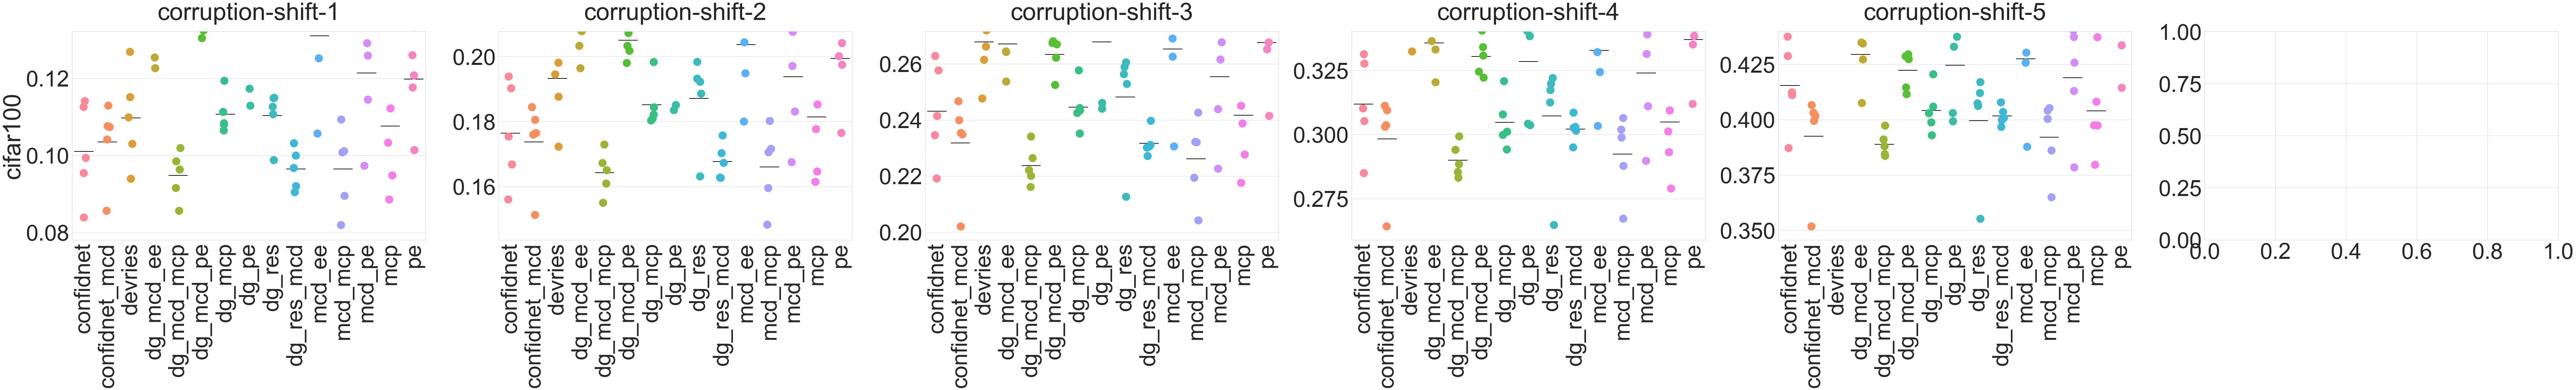

In [199]:
# ************************ RISK PLOTS *******************************
import random
metrics = ["diff_risk"]
plot_exps = ["cifar100"]#exp_names
cross_mode = False
scale = 15
sns.set_style("whitegrid")
# sns.color_palette("tab20")
# palette = sns.color_palette()
# c = []
# for ix in range(15):
#     print(ix)
#     c.append(palette[ix])
# print(c)
# random.shuffle(c)
# print(c)
# sns.set_palette(c)
sns.set_context("paper", font_scale=scale * 0.5)
dims = ["confid"]


for metric in metrics:
    if not cross_mode:
        for exp in plot_exps:
            plot_data = df[df.study.str.startswith(exp + "_")][["study", "confid", "run", metric]]
            studies = plot_data.study.unique().tolist()
            studies = [c for c in studies if not "val_tuning" in c]# & (data["ne"].str.contains("250")) & (data["ap"]==False)]
            plot_studies = studies#[c for c in studies if not ("noise" in c or "noise_study_1" in c)]
            cols = [c for c in plot_studies if exp + "_" in c]
            plot_studies =  ["{}_iid_study".format(exp)] + [c for c in cols if "noise_study_3" in c] + [c for c in cols if "in_class" in c] + [c for c in cols if "proposed" in c]
            plot_studies = [c for c in cols if "noise" in c]
            print(studies, plot_data.columns)
            ncols = len(plot_studies)
            print("CHECK COLS", ncols, plot_studies)
            f, axs = plt.subplots(nrows=len(dims), ncols=6, figsize=(6*scale*1.2, len(dims)*scale * 1.2))
            for xix, dim in enumerate(dims):
                for yix, study in enumerate(plot_studies):
                    y = metric
                    data = plot_data[plot_data.study == study].sort_values(by="confid")
                    # if not "noise" in study or "noise_study_3" in study:
                    print(study)
                    sns.stripplot(ax=axs[yix], x=dim, y=metric, data=data, s = scale*1.6, label=dim)
                    sns.boxplot(ax=axs[yix], x=dim, y=metric, data=data, medianprops=dict(alpha=0), saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
                    # axs[yix].set_xticklabels("")
                    axs[yix].set_xticklabels(axs[yix].get_xticklabels(),rotation=90)
                    title = study
                    title = title.replace(exp + "_", "")
                    title = title.replace("_proposed_mode", "")
                    title = title.replace("_", "-")
                    title = title.replace("-study-", "-shift-")
                    title = title.replace("in-class", "sub-class")
                    title = title.replace("noise", "corruption")
                    title = title.replace("-resize", "")
                    title = title.replace("-wilds-ood-test", "")
                    title = title.replace("-ood-test", "")
                    title = title.replace("-superclasses", "")
                    axs[yix].set_title(title, pad=35)
                    axs[yix].set_ylabel("")
                    axs[yix].set_xlabel("")
                    lim = data[metric].mean() + data[metric].std()
                    axs[yix].set_ylim(axs[yix].get_ylim()[0], lim)
                    if yix == 0:
                        axs[yix].set_ylabel(exp)

                    # if yix == 5:
                    #     axs[yix].axis("off")
                    #     axs[yix-1].legend()

                    # if "iid" in study and metric == "aurc":
                    #     axs[xix, yix].set_ylim(4, 8)
                    # if "iid" in study and metric == "failauc":
                    #     axs[xix, yix].set_ylim(0.90, 0.96)
            plt.tight_layout()
            plt.savefig("/Users/Paul/research/files/analysis/paper_plots/RISK_final_paper_{}_{}.png".format(exp, metric))







In [ ]:
''